In [2]:
#%load_ext autotime
%load_ext autoreload
%autoreload 2


In [3]:

import numpy as np
from sunRay import densityModel as dm
import matplotlib.pyplot as plt
import torch

In [4]:
bkgrd_N = dm.parkerfit

In [5]:
y = 0
x = torch.linspace(-30,30,500)
z = torch.linspace(-30,30,500)
zz,xx = torch.meshgrid(z,x)

Ne = bkgrd_N(np.sqrt(xx**2+y**2+zz**2))* (torch.sign(xx**2+zz**2-10)+1)/2

Text(0, 0.5, 'Y ($R_s$)')

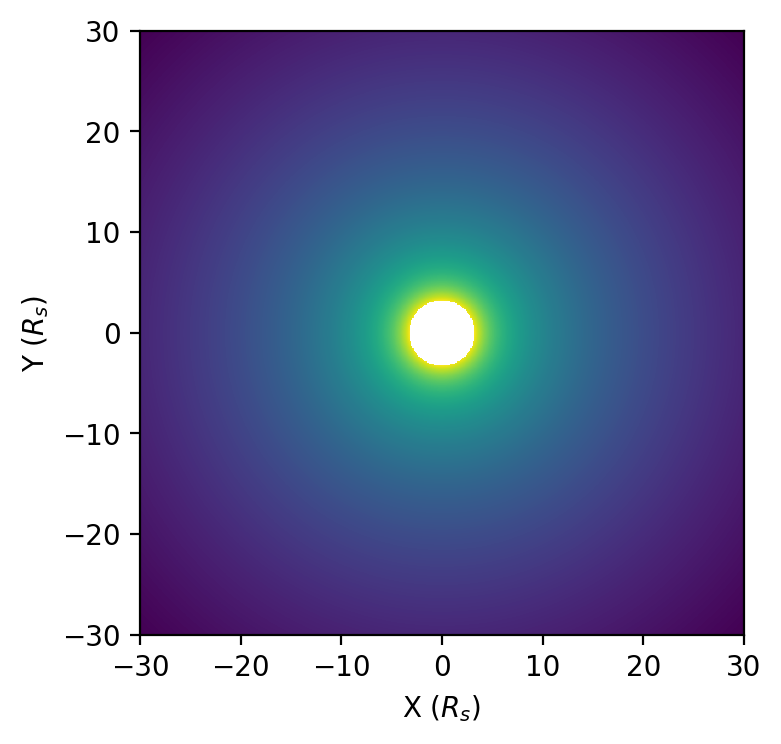

In [10]:

plt.figure(dpi=200)
plt.imshow(torch.log(Ne),extent=[torch.min(x),torch.max(x),torch.min(z),torch.max(z)])
plt.xlabel('X ($R_s$)')
plt.ylabel('Y ($R_s$)')

Text(0, 0.5, 'Y ($R_s$)')

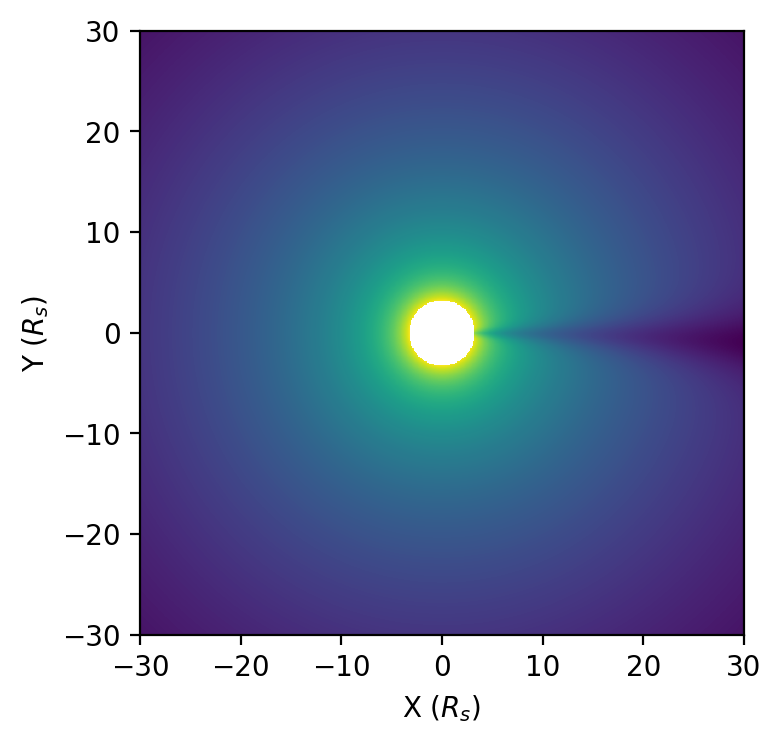

In [32]:
R_io = 0.3

C0 = torch.Tensor([1,0,0]) # center of the tube

def C0(r,theta):
    #return #torch.Tensor([1.0])
    return r*torch.sin(theta)
def C1(r,theta):
    return torch.Tensor([0.0])
def C2(r,theta):
    #return torch.Tensor([1.0/2])
    return r*torch.cos(theta)

theta0 = 3.1415926/2
a=1e-3
r0=1

d=0.13
def new_Ne(x,y,z):
    R = torch.sqrt(x**2+y**2+z**2)
    Theta = theta0 -a*(R-r0)
    cc0=C0(R,Theta)
    cc1=C1(R,Theta)
    cc2=C2(R,Theta)
    Rc =  torch.sqrt(cc0**2+cc1**2+cc2**2) 
    Ne = bkgrd_N(R) * (R_io+(1-R_io)*
                       torch.tanh(
                       torch.sqrt(
                        (x/R-cc0/Rc)**2+
                        (y/R-cc1/Rc)**2+
                        (z/R-cc2/Rc)**2)/d    )**2)
    return Ne

Ne2 = new_Ne(xx,y,zz)* (torch.sign(xx**2+zz**2-10)+1)/2

plt.figure(dpi=200)
plt.imshow(torch.log(Ne2),extent=[torch.min(x),torch.max(x),torch.min(z),torch.max(z)])
plt.xlabel('X ($R_s$)')
plt.ylabel('Y ($R_s$)')

In [209]:
torch.atan2(torch.Tensor([0.1]),torch.Tensor([-100]))

tensor([3.1406])